## What is EDA? - Example

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#  Sample Dataset

df = pd.DataFrame ({
    'Age': [22, 25, 47, 52, 46, 56, 48, 55, 60, 120],  # 120 is an outlier
    'Salary': [25000, 27000, 47000, 52000, 46000, 56000, 48000, 55000, 60000, 65000]
})

In [3]:
# Summarize key features

print ("Summary Statistics:")
print (df.describe())

Summary Statistics:
              Age        Salary
count   10.000000     10.000000
mean    53.100000  48100.000000
std     26.681038  13067.772062
min     22.000000  25000.000000
25%     46.250000  46250.000000
50%     50.000000  50000.000000
75%     55.750000  55750.000000
max    120.000000  65000.000000


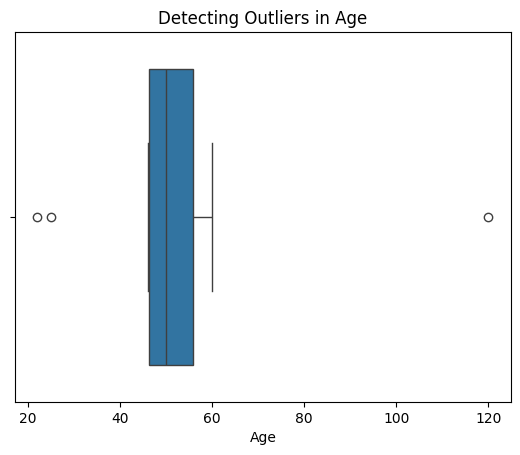

In [4]:
# Detect outliers visually

sns.boxplot (x=df['Age'])
plt.title("Detecting Outliers in Age")
plt.show()

In [5]:
# z-score method to detect outliers

z_scores = stats.zscore(df['Age'])
outliers = df[(abs(z_scores) > 3)]
print("\nOutliers detected based on Z-score:")
print(outliers)


Outliers detected based on Z-score:
Empty DataFrame
Columns: [Age, Salary]
Index: []


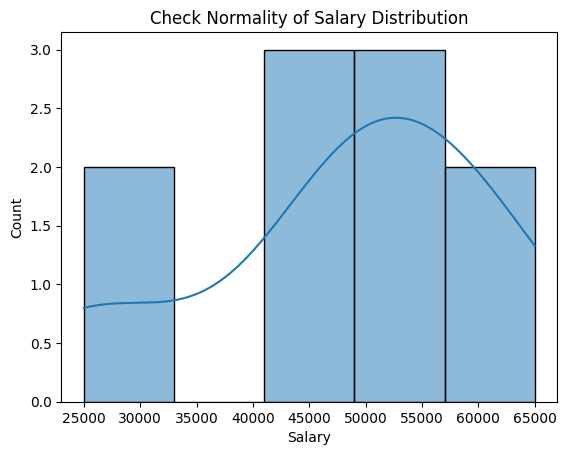

In [6]:
# Validate assumptions (e.g., normality)
sns.histplot (df['Salary'], kde=True)
plt.title("Check Normality of Salary Distribution")
plt.show()

## Data Collection and Import

- Data sources (CSV, Excel, APIs, Database)
- Example :

In [7]:
import pandas as pd
# Load the dataset from a CSV file
df = pd.read_csv("data.csv")

# Displat first 5 rows
print(df.head())

   x   y
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10


## Data Cleaning

- Handel missing values:
- df.fillna(), df.dropna()

In [8]:
import pandas as pd
 # Sample datasett with missing values (NaN)
data = {
  'Name':  ['Amit', 'Bina', 'Chirag', 'Disha', None],
  'Age': [25, None, 30, 28, None],
  'Score' : [85, 90, None, 88, 92]
 }

df = pd.DataFrame(data)
print(df)

     Name   Age  Score
0    Amit  25.0   85.0
1    Bina   NaN   90.0
2  Chirag  30.0    NaN
3   Disha  28.0   88.0
4    None   NaN   92.0


In [9]:
df_filled = df.fillna(0)
print(df_filled)

     Name   Age  Score
0    Amit  25.0   85.0
1    Bina   0.0   90.0
2  Chirag  30.0    0.0
3   Disha  28.0   88.0
4       0   0.0   92.0


In [11]:
df_filled = df.fillna({
    'Name': 'Unknown', 'Age': df['Age'].mean(), 'Score': 0
})
print(df_filled)

      Name        Age  Score
0     Amit  25.000000   85.0
1     Bina  27.666667   90.0
2   Chirag  30.000000    0.0
3    Disha  28.000000   88.0
4  Unknown  27.666667   92.0


In [12]:
df_dropped = df.dropna()
print(df_dropped)

    Name   Age  Score
0   Amit  25.0   85.0
3  Disha  28.0   88.0


- Outlier detection:
- IQR method, Z-score method

In [14]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'Age': [22, 25, 47, 52, 46, 56, 48, 55, 60, 120]
})

# Calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Detect outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers_iqr = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print("Q1 =", Q1, "Q3 =", Q3, " IQR =", IQR)
print("Lower Bound:", lower_bound, "Upper Bound:", upper_bound)
print("\nOutliers (IQR Method) :")
print(outliers_iqr)

Q1 = 46.25 Q3 = 55.75  IQR = 9.5
Lower Bound: 32.0 Upper Bound: 70.0

Outliers (IQR Method) :
   Age
0   22
1   25
9  120


In [15]:
import pandas as pd
from scipy import stats

# Sample data
df = pd.DataFrame({
    'Age': [22, 25, 47, 52, 46, 56, 48, 55, 60, 120]
})

# Compute Z-scores
df['Z_Score'] = stats.zscore(df['Age'])

# Identify outliers ( |Z| > 3)
outliers_z = df[abs(df['Z_Score']) > 3]

print(df)
print("\nOutliers (Z-Score Method):")
print(outliers_z)

   Age   Z_Score
0   22 -1.228673
1   25 -1.110152
2   47 -0.240994
3   52 -0.043458
4   46 -0.280501
5   56  0.114571
6   48 -0.201487
7   55  0.075064
8   60  0.272600
9  120  2.643030

Outliers (Z-Score Method):
Empty DataFrame
Columns: [Age, Z_Score]
Index: []


### Type correction

In [16]:
import pandas as pd
df = pd.DataFrame ({
    'ID': ['1', '2', '3', '4'],
    'Age': ['23', '25', 'NaN', '30'],
    'Salary': ['50000',  '62000', '58000', '55000'],
    'JoinDate': ['2021-06-01', '2021-07-15', '2021-08-05', 'invalid']
})
print(df.dtypes)

ID          object
Age         object
Salary      object
JoinDate    object
dtype: object


### Type Correction Step: Example - Convert numeric columns

In [17]:
df['ID'] = df['ID'].astype(int)
df['Salary'] = df['Salary'].astype(float)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

### Encoding categorical variables

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size' : ['S', 'M', 'L', 'S', 'M'],
    'Brand': ['Nike', 'Adidas', 'Puma', 'Adidas', 'Nike']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Initialize label encoder
le = LabelEncoder()

# Apply lable encoding to all categorical columns
for col in df.columns:
    df[col] = le.fit_transform(df[col])

print ("\nLable Encoded DataFrame:")
print(df)

Original DataFrame:
   Color Size   Brand
0    Red    S    Nike
1   Blue    M  Adidas
2  Green    L    Puma
3   Blue    S  Adidas
4    Red    M    Nike

Lable Encoded DataFrame:
   Color  Size  Brand
0      2     2      1
1      0     1      0
2      1     0      2
3      0     2      0
4      2     1      1


### Normalization / Scaling

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Example data
df = pd.DataFrame({
    'Age': [18, 25, 40, 60],
    'Salary': [30000, 50000, 80000, 120000]
})

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[['Age_norm', 'Salary_norm']] = scaler.fit_transform(df[['Age', 'Salary']])
print(df)

   Age  Salary  Age_norm  Salary_norm
0   18   30000  0.000000     0.000000
1   25   50000  0.166667     0.222222
2   40   80000  0.523810     0.555556
3   60  120000  1.000000     1.000000


## Descriptive Statistics (Numerical Data)

- Mean, Median, Mode -- central tendency.
- Range, Variance, Standard Deviation -- data spread.
- Visual:
- Histogram & Boxplot


## - Example

<Axes: xlabel='Age', ylabel='Count'>

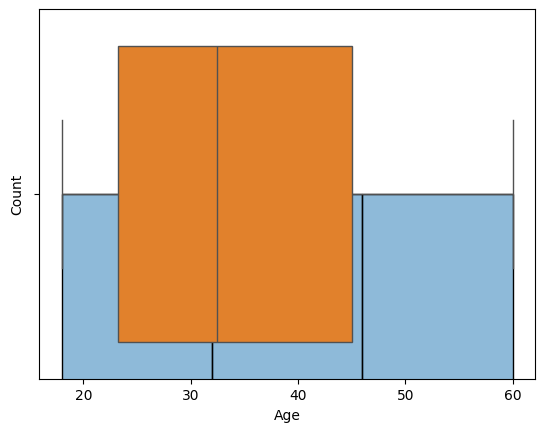

In [24]:
import pandas as pd
df.describe()  # Shows summary of numeric columns.
sns.histplot(df['Age'], kde=True)
sns.boxplot(x=df['Age'])

## Categorical Data
- Frequency tables
- Bar chart, Pie chart
- Example:

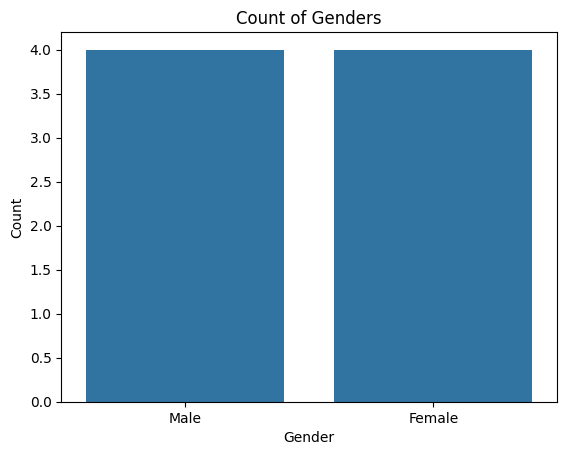

In [26]:
import pandas as pd
import seaborn as snd
import matplotlib.pyplot as plt

# Sample Dataframe
df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Age': [21, 23, 25, 22, 28, 24, 26, 27]
})

# Count plot for Gender
sns.countplot(x='Gender', data=df)

plt.title("Count of Genders")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Numerical vs Numerical
- Scatter Plot, Correlation
- Example:

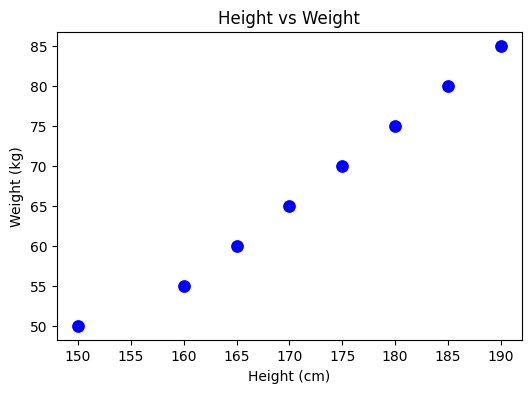

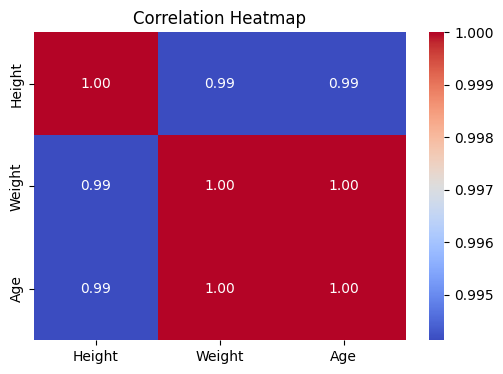

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
df = pd.DataFrame({
    'Height': [150, 160, 165, 170, 175, 180, 185, 190],
    'Weight': [50, 55, 60, 65, 70, 75, 80, 85],
    'Age': [21, 22, 23, 24, 25, 26, 27, 28]
})

# Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Height', y='Weight', data=df, color='blue', s=100)
plt.title("Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## t-test example (Male vs Female means)

In [9]:
import pandas as pd
from scipy.stats import ttest_ind

# Sample DataFrame
df = pd.DataFrame({
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Salary': [50000, 48000, 52000, 47000, 51000, 49000, 53000, 46000]
})

# Perform two-sample t-test (independent)    #independent population
t_stat, p_value = ttest_ind(
    df['Salary'] [df['Gender']=='M'],
    df['Salary'] [df['Gender']=='F']
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Salaries differ between genders")
else:
    print("Fall to reject the null hypothesis: No significant difference in salaries")

T-statistic: 4.381780460041329
P-value: 0.004659214943993933
Reject the null hypothesis: Salaries differ between genders


## Cross-tabulation
- A contingency table (also called a cross- tabulation table) is a matrix format table that displys the frequency couts of combinations of two (or more) categorical variables.
- It is the first step before performing a Chi-square test of independence.

In [17]:
import pandas as pd
from scipy.stats import chi2_contingency

# Sample dataset
df = pd.DataFrame({
    'Gender': ['M', 'F', 'F', 'M', 'F', 'M', 'M', 'F'],
    'Purchased': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
})

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Purchased'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Step 3: Interpretation
alpha = 0.05
if p < alpha:
    print("\nReject null hypothesis: Gender and Purchased are dependent")
else:
    print("\nFail to reject null hypothesis: Gender and Purchased are independent")

Contingency Table:
Purchased  No  Yes
Gender            
F           2    2
M           2    2

Chi-square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
[[2. 2.]
 [2. 2.]]

Fail to reject null hypothesis: Gender and Purchased are independent
